# Tomato Plant Disease Classification

### Problem Statement: 
- #### This project predicts the fungal and bacterial diseases in tomato plants with an android app and help farmers identify the particular type of disease early to apply specific treatment to control the economic loss.

- #### Dataset: https://www.kaggle.com/datasets/arjuntejaswi/plant-village

#### Importing Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

#### Import data into tensorflow dataset object
- ##### image_dataset_from_directory api to load all images in tensorflow dataset

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 7579 files belonging to 5 classes.


#### Name of classes

In [4]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_healthy']

#### Number of batches

In [5]:
len(dataset) # batch size is 68

237

#### Tensor data of all the images in the first batch along with the labels

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch)
    print(label_batch)

tf.Tensor(
[[[[194. 198. 210.]
   [201. 205. 217.]
   [203. 207. 219.]
   ...
   [159. 162. 181.]
   [129. 132. 151.]
   [118. 121. 140.]]

  [[201. 205. 217.]
   [204. 208. 220.]
   [204. 208. 220.]
   ...
   [158. 161. 180.]
   [145. 148. 167.]
   [152. 155. 174.]]

  [[206. 210. 222.]
   [203. 207. 219.]
   [203. 207. 219.]
   ...
   [156. 159. 178.]
   [147. 150. 169.]
   [155. 158. 177.]]

  ...

  [[129. 125. 148.]
   [122. 118. 141.]
   [114. 110. 133.]
   ...
   [ 98.  90. 111.]
   [ 99.  91. 112.]
   [ 96.  88. 109.]]

  [[114. 110. 133.]
   [112. 108. 131.]
   [111. 107. 130.]
   ...
   [100.  92. 113.]
   [102.  94. 115.]
   [ 95.  87. 108.]]

  [[124. 120. 143.]
   [127. 123. 146.]
   [129. 125. 148.]
   ...
   [117. 109. 130.]
   [120. 112. 133.]
   [107.  99. 120.]]]


 [[[150. 140. 138.]
   [146. 136. 134.]
   [131. 121. 119.]
   ...
   [152. 144. 142.]
   [151. 143. 141.]
   [158. 150. 148.]]

  [[159. 149. 147.]
   [158. 148. 146.]
   [144. 134. 132.]
   ...
   [159. 1

#### Converting the tensor labels into numpy array

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 3 1 2 0 1 2 0 3 2 3 0 0 0 4 4 0 4 4 4 1 1 4 0 4 3 1 3 2 2 4]


#### Converting the tensor images into numpy array

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[160. 152. 163.]
  [145. 137. 148.]
  [132. 124. 135.]
  ...
  [156. 146. 155.]
  [123. 113. 122.]
  [ 95.  85.  94.]]

 [[139. 131. 142.]
  [146. 138. 149.]
  [152. 144. 155.]
  ...
  [123. 113. 122.]
  [107.  97. 106.]
  [ 94.  84.  93.]]

 [[127. 119. 130.]
  [ 97.  89. 100.]
  [109. 101. 112.]
  ...
  [118. 108. 117.]
  [135. 125. 134.]
  [ 93.  83.  92.]]

 ...

 [[126. 124. 135.]
  [175. 173. 184.]
  [153. 151. 162.]
  ...
  [154. 151. 158.]
  [148. 145. 152.]
  [152. 149. 156.]]

 [[158. 156. 167.]
  [165. 163. 174.]
  [148. 146. 157.]
  ...
  [148. 145. 152.]
  [148. 145. 152.]
  [158. 155. 162.]]

 [[205. 203. 214.]
  [173. 171. 182.]
  [157. 155. 166.]
  ...
  [148. 145. 152.]
  [152. 149. 156.]
  [151. 148. 155.]]]


#### Visualizing the first image from the first batch

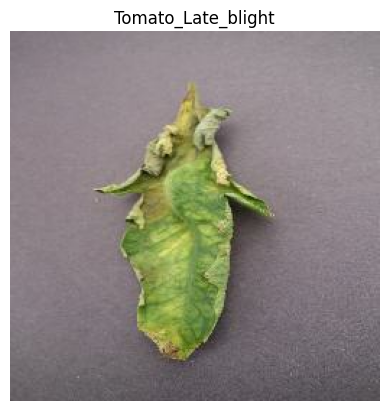

In [9]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')

#### Visualizing all the images from the dataset

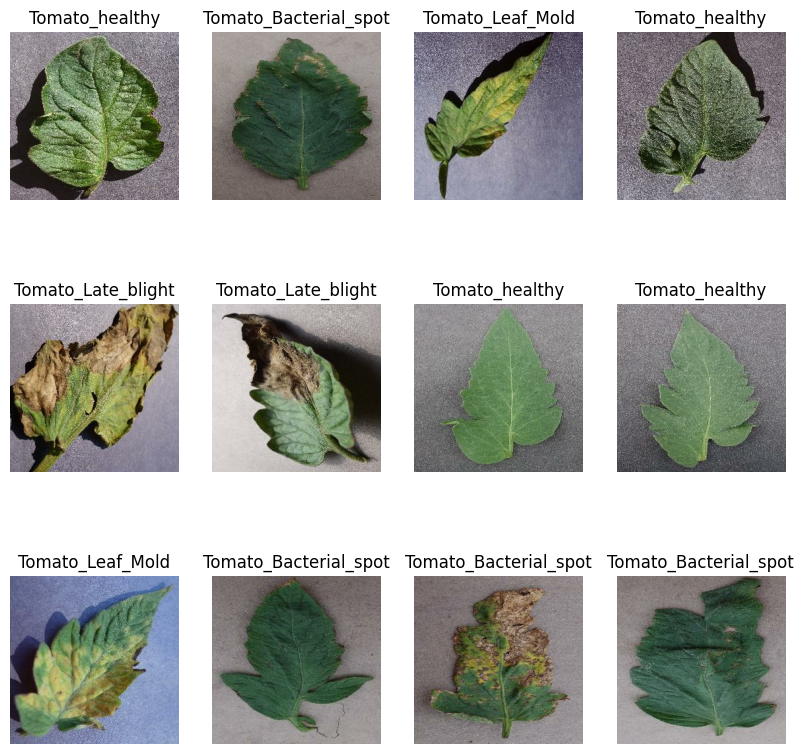

In [10]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

#### Splitting the data into 80% training data, 10% validation data and 10% test data

In [11]:
train_size = 0.8
len(dataset)*train_size

189.60000000000002

In [12]:
train_ds = dataset.take(54)
len(train_ds)

54

In [13]:
test_ds = dataset.skip(54)
len(test_ds)

183

In [14]:
val_data = 0.1
len(dataset)*val_data

23.700000000000003

In [15]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [16]:
def get_data_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1):
    shuffle=True 
    shuffle_size=1000
    ds_size = len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split *ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [17]:
train_ds, val_ds, test_ds = get_data_partitions_tf(dataset)

In [18]:
len(train_ds)

189

In [19]:
len(val_ds)

23

In [20]:
len(test_ds)

25

#### On top of the returned caching shuffling and prefetching is done, Optimization is done for increasing the performance of the training

In [21]:

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

#### Preprocessing and Scaling the numpy arrays for images by creating layers

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

#### Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    #layers.experimental.preprocessing.RandomRotation(0.2),
])

### Building CNN model Architecture
- #### We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation

In [24]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 5

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),

])

model.build(input_shape=input_shape)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

### Compiling the Model

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
189/189 [==============================] - 1964s 8s/step - loss: 1.0225 - accuracy: 0.5913 - val_loss: 0.7167 - val_accuracy: 0.7106
Epoch 2/10
189/189 [==============================] - 899s 5s/step - loss: 0.4785 - accuracy: 0.8193 - val_loss: 0.4817 - val_accuracy: 0.8098
Epoch 3/10
189/189 [==============================] - 1068s 6s/step - loss: 0.3974 - accuracy: 0.8504 - val_loss: 0.4054 - val_accuracy: 0.8438
Epoch 4/10
189/189 [==============================] - 1080s 6s/step - loss: 0.3144 - accuracy: 0.8842 - val_loss: 0.3818 - val_accuracy: 0.8505
Epoch 5/10
189/189 [==============================] - 1097s 6s/step - loss: 0.2463 - accuracy: 0.9093 - val_loss: 0.3755 - val_accuracy: 0.8614
Epoch 6/10
189/189 [==============================] - 2068s 11s/step - loss: 0.2119 - accuracy: 0.9191 - val_loss: 0.3994 - val_accuracy: 0.8533
Epoch 7/10
189/189 [==============================] - 1350s 7s/step - loss: 0.1680 - accuracy: 0.9391 - val_loss: 0.3113 - val_accuracy:

In [28]:
scores = model.evaluate(test_ds)

25/25 [==============================] - 606s 1s/step - loss: 0.3323 - accuracy: 0.9044


You can see above that we get 90.50% accuracy for our test dataset. This is considered to be a pretty good accuracy

In [29]:
scores

[0.33226290345191956, 0.904402494430542]

### Plotting the Accuracy and Loss Curves

In [30]:
history

In [31]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 189}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
history.history['accuracy']

[0.5912626385688782,
 0.8192950487136841,
 0.8504054546356201,
 0.884163498878479,
 0.9093165397644043,
 0.9190798997879028,
 0.9391030669212341,
 0.947046160697937,
 0.9539963603019714,
 0.9566440582275391]

In [34]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

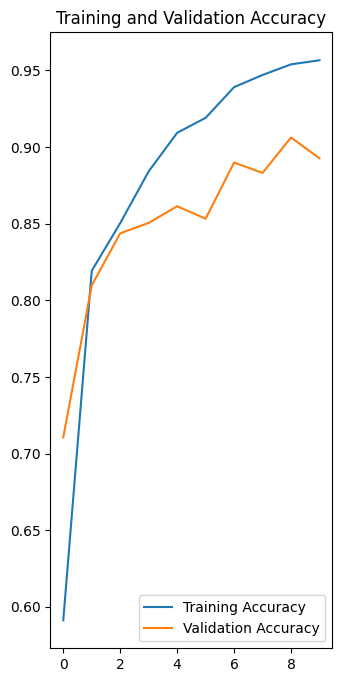

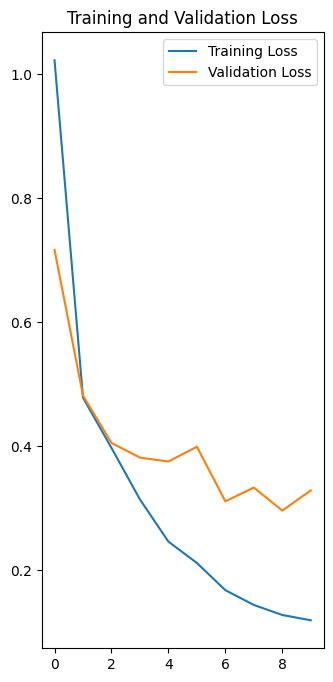

In [35]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), accuracy, label='Training Accuracy')
plt.plot(range(EPOCHS), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

[[[174. 167. 174.]
  [173. 166. 173.]
  [171. 164. 171.]
  ...
  [160. 154. 164.]
  [123. 117. 127.]
  [189. 183. 193.]]

 [[169. 162. 169.]
  [175. 168. 175.]
  [157. 150. 157.]
  ...
  [147. 141. 151.]
  [153. 147. 157.]
  [172. 166. 176.]]

 [[162. 155. 162.]
  [183. 176. 183.]
  [148. 141. 148.]
  ...
  [174. 168. 178.]
  [102.  96. 106.]
  [128. 122. 132.]]

 ...

 [[138. 127. 135.]
  [ 92.  81.  89.]
  [108.  97. 105.]
  ...
  [129. 119. 128.]
  [107.  97. 106.]
  [167. 157. 166.]]

 [[133. 122. 130.]
  [105.  94. 102.]
  [109.  98. 106.]
  ...
  [172. 162. 171.]
  [167. 157. 166.]
  [123. 113. 122.]]

 [[128. 117. 125.]
  [ 95.  84.  92.]
  [137. 126. 134.]
  ...
  [126. 116. 125.]
  [109.  99. 108.]
  [134. 124. 133.]]]


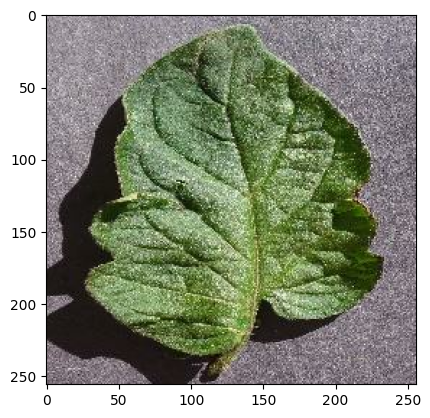

In [36]:
for images_batch, labels_batch in test_ds.take(1):
    print(image_batch[0].numpy())
    plt.imshow(image_batch[0].numpy().astype('uint8'))

### Run prediction on a sample image

first image to predict
first image actual label:  Tomato_Late_blight
1/1 [==============================] - 6s 6s/step
first image predicted label:  Tomato_healthy


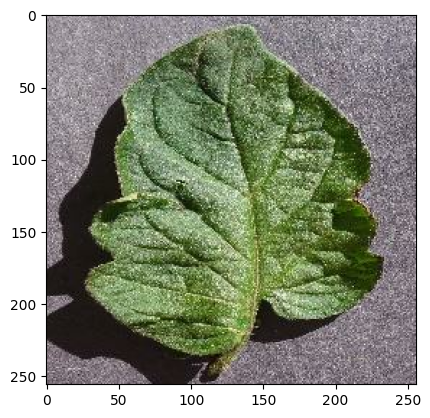

In [37]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print('first image to predict')
    plt.imshow(first_image)
    print('first image actual label: ',class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print('first image predicted label: ',class_names[np.argmax(batch_prediction[0])])

#### Function for inference

In [38]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

####  Inference on few sample images

1/1 [==============================] - 0s 145ms/step


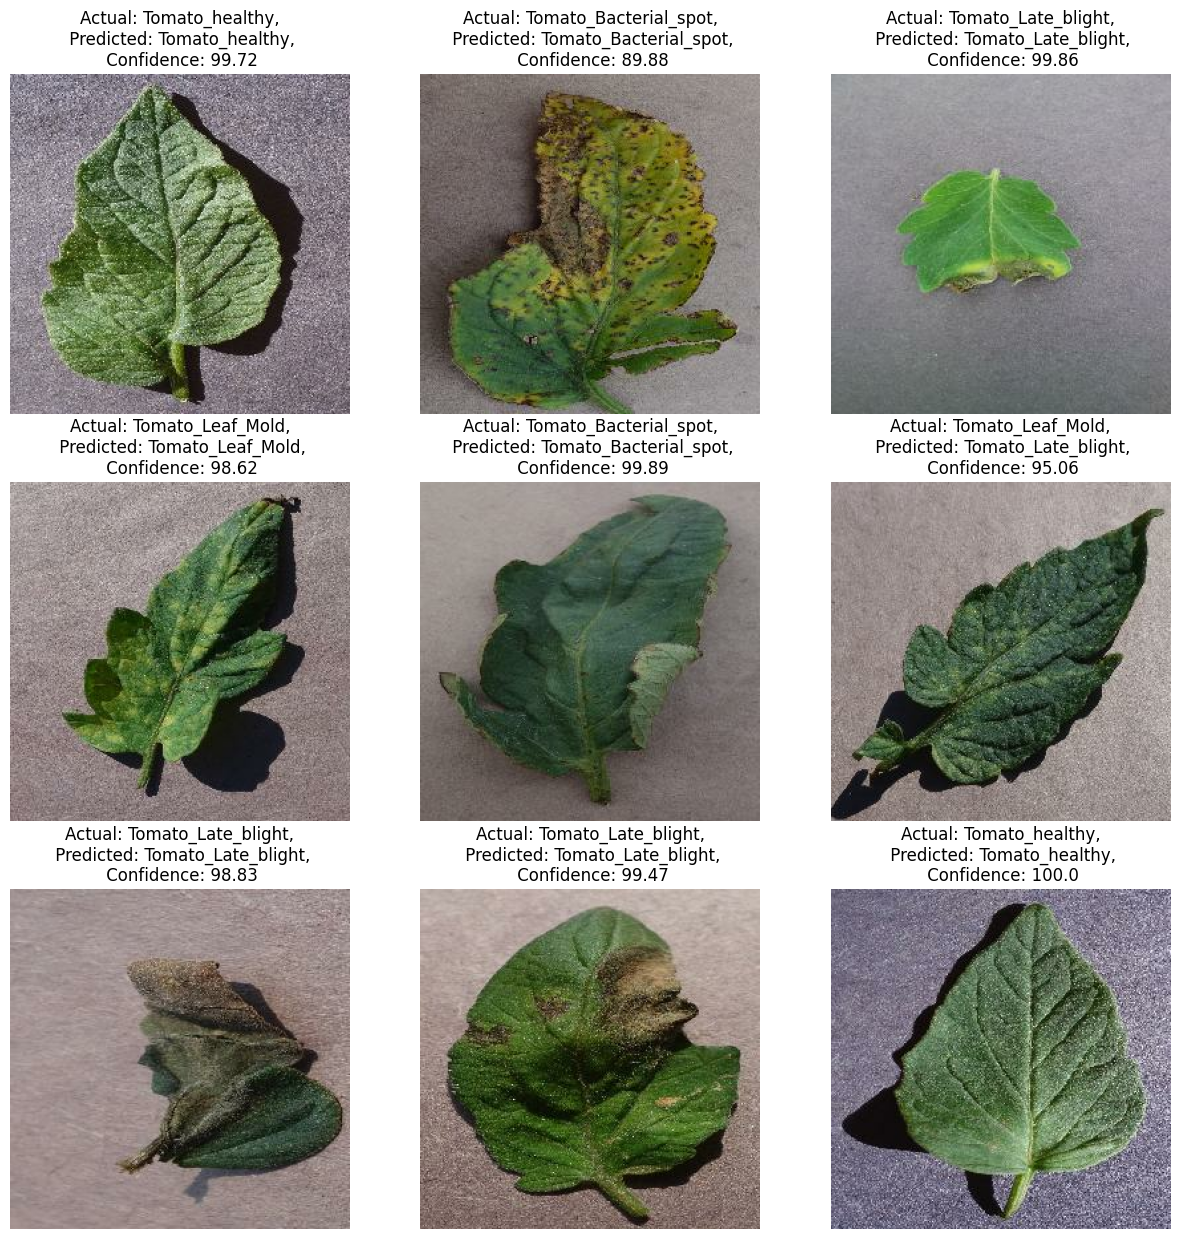

In [39]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class , confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}")
        plt.axis('off')

### Save the model

In [46]:
import os
model_version = 4
model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/4\assets


INFO:tensorflow:Assets written to: ../saved_models/4\assets


In [47]:
model.save("../tomatoes.h5")